2. Study and implement hierarchical clustering (agglomerative clustering: a bottom-up approach) which is very similar to k-means.

[Note: The other type is 'Hierarchical Divisive Clustering', which is a top-down approach]

In [28]:
# Source: https://www.geeksforgeeks.org/ml-hierarchical-clustering-agglomerative-and-divisive-clustering/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h4> Create Datapoints </h4>

In [2]:
np.random.seed(0)

# np.random.normal(mean, std_deviation, output_shape)
cluster1 = np.random.normal(10, 3, (30, 30))
cluster2 = np.random.normal(20, 3, (30, 30))

In [3]:
x1 = cluster1[0]
y1 = cluster1[1]

x2 = cluster2[0]
y2 = cluster2[1]

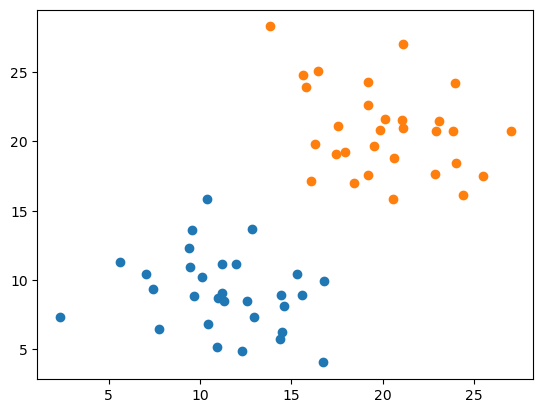

In [4]:
plt.scatter(x1, y1)
plt.scatter(x2, y2)

In [22]:
data = (np.concatenate((x1, x2)), np.concatenate((y1, y2)))

class_labels = [0 for i in range(len(x1))]
class_labels.extend([1 for i in range(len(x2))])

class_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [6]:
import math

def distance(point1, point2, metric='euclidean'):
    if metric == 'euclidean':
        return math.sqrt(math.pow(point1[0] - point2[0], 2) + math.pow(point1[1] - point2[1], 2))
    elif metric == 'manhattan':
        return abs(point1[0] - point2[0]) - abs(point1[1] - point2[1])

In [7]:
def CreateClusters(x, y):
    clusters = []

    for i in zip(x, y):
        clusters.append(i)
        
    return clusters

In [25]:
# Agglomerative Clustering (Bottom-Up) is a type of Hierarchical Clustering

def AgglomeratedClusters(x, y, n_clusters=1):
    clusters = CreateClusters(x, y)
    
    while len(clusters) != n_clusters:
        # Find the 2 clusters with the minimum distance
        min_point1 = ()
        min_point2 = ()
        min_dist = 99999
        
        for i in range(len(clusters)):
            for j in range(i, len(clusters)):
                # Avoid considering the distance of cluster with itself
                if i != j:
                    d = distance(clusters[i], clusters[j])

                    if d < min_dist:
                        min_point1 = i
                        min_point2 = j
                        min_dist = d

        x1 = clusters[min_point1][0]
        y1 = clusters[min_point1][1]

        x2 = clusters[min_point2][0]
        y2 = clusters[min_point2][1]

        # Append centroid of 2 closest clusters
        x = (x1 + x2) / 2
        y = (y1 + y2) / 2
        clusters.append((x, y))

        clusters.pop(min_point1)
        clusters.pop(min_point2)

    return clusters

In [26]:
AgglomeratedClusters(data[0], data[1], 2)

[(7.7735049387806745, 6.458103447632764),
 (17.04401678202606, 21.35767731994906)]

In [10]:
def AgglomerativeClustering(x, y, n_clusters = 2):
    clusters = AgglomeratedClusters(x, y, n_clusters)
    
    out = []
    
    for i in zip(x, y):
        min_dist = 9999
        
        for j in range(len(clusters)):
            d = distance(i, clusters[j])
            
            if (d < min_dist):
                min_dist = d
                cls = j
        
        out.append(cls)
        
    return out


In [20]:
pred = AgglomerativeClustering(data[0], data[1], 2)

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(class_labels, pred)

array([[28,  2],
       [ 0, 30]])